# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    
    x = np.sort(data)

    y = np.arange(1, n+1) / n

    return x, y

# 1. Is the distribution of body temperatures normal?

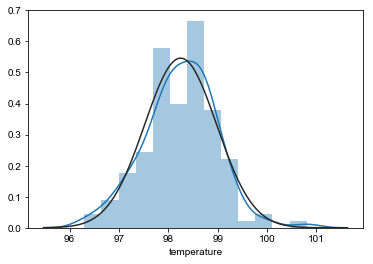

In [16]:
temp = df['temperature']
sns.distplot(body_temp, fit=norm)

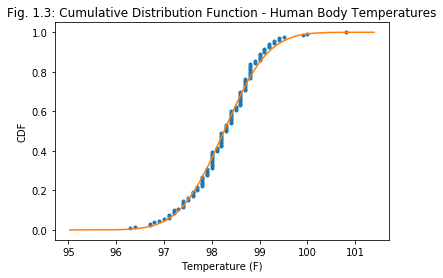

In [15]:
x, y = ecdf(temp)

# draw 100,000 random samples from a normal distribution
nm_temp = np.random.normal(np.mean(temp), np.std(temp), 100000)
nm_x, nm_y = ecdf(nm_temp)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(nm_x, nm_y)

_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
plt.show()

The CDF plot shows that the frequency distribution of the data is very close to normal,, the distribution of body temperatures is normal

# 2. Is the sample size large? Are the observations independent?

In [6]:
len(body_temp)

130

Since the sample size is 130 which greater than 30, the sample size large. Since everybody's body temperature is independent, the observations are independent.

# 3. Is the true population mean really 98.6 degrees F?

H0: population mean is 98.6 degrees F
Ha: population mean is not 98.6 degrees F

In [17]:
bs_replicates = np.empty(100000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(temp, len(temp))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size

print('p-value: {}'.format(p))
print('mean: {:0.5}'.format(np.mean(bs_replicates)))

p-value: 0.0
mean: 98.249


Since the P value is 0, we can reject the null hypothesis, and conclude that the population mean is 98.2 degrees F.

When comparing the mean of a single sample to a population, we should use one-sample test. 

Z-statistic requires the population standard deviation, which is unknown. The t-statistic requires only the sample standard deviation, which can be derived.

In [18]:
t_stat = stats.ttest_1samp(temp, 98.6)
print('t-score: {}\np-value: {}'.format(round(t_stat.statistic, 5), round(t_stat.pvalue, 5)))

t-score: -5.45482
p-value: 0.0


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [19]:
sample_temp = np.random.choice(a = temp, size=10)
r = stats.ttest_1samp(sample_temp, 98.6)
print('t-score: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))

t-score: -1.712
p-value: 0.1211


Since the population standard deviation is unknown, we can only use the t-test. The p-value is greater than 0.05, so the null hypothesis cannot be rejected. 

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [20]:
# get the sample mean and standard deviation for use with bootstrap and frequentist approaches below
x_bar = np.mean(temp)
s = np.std(temp)
print('sample mean: {:0.4}\nsample standard deviation: {:0.4}\n'.format(x_bar, s))

sample mean: 98.25
sample standard deviation: 0.7304



In [21]:
bootstrap_replicates = np.empty(100000)

size = len(bootstrap_replicates)

for i in range(size):
    bootstrap_sample = np.random.choice(temp, size=len(temp))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)

p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p-value: {}'.format(p))

x_bar = np.mean(bootstrap_replicates)
ci = stats.norm.interval(0.95, loc=x_bar, scale=s)

print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))
print('margin of error: +/-{:0.5}\n\n'.format((ci[1] - x_bar)))

p-value: 0.0
95% confidence interval: 96.818 - 99.68
margin of error: +/-1.4315




In [23]:
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=x_bar, scale=s)

print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_low_f, ci_high_f))
print('margin of error: +/-{:0.5}'.format((ci_high_f - x_bar))) 

95% confidence interval: 96.818 - 99.68
margin of error: +/-1.4315


When temperature is below 96.818 or above 99.68 will consider to be abnormal. 

# 6 Is there a significant difference between males and females in normal temperature?

H0: There is no significant difference between males and females in normal temperature
HA: There is significant difference between males and females in normal temperature

In [30]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']
temp_m = males.temperature
temp_f = females.temperature
print('MALES')
xbar_m = np.mean(temp_m)
s_m = np.std(temp_m)
print('sample mean: {}\nsample standard deviation: {}\n'.format(round(xbar_m, 3), round(s_m, 3)))

# confidence interval for one draw
ci_low_m, ci_high_m = stats.norm.interval(0.95, loc=xbar_m, scale=s_m)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_m, 3), round(ci_high_m, 3)))

# females
print('\n\nFEMALES')
xbar_f = np.mean(temp_f)
s_f = np.std(temp_f)
print('sample mean: {}\nsample standard deviation: {}\n'.format(round(xbar_f, 3), round(s_f, 3)))

# confidence interval for one draw
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=xbar_f, scale=s_f)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_f, 3), round(ci_high_f, 3)))

MALES
sample mean: 98.105
sample standard deviation: 0.693

95% confidence interval (one draw): 96.746 - 99.464


FEMALES
sample mean: 98.394
sample standard deviation: 0.738

95% confidence interval (one draw): 96.948 - 99.84


In [31]:
size = 10000
bs_replicates_m = np.empty(size)

for i in range(size):
    bs_sample_m = np.random.choice(temp_m, len(temp_m))
    bs_replicates_m[i] = np.mean(bs_sample_m)
    
bs_mean_m = np.sum(bs_replicates_m)/size

bs_replicates_f = np.empty(size)

for i in range(size):
    bs_sample_f = np.random.choice(temp_f, len(temp_f))
    bs_replicates_f[i] = np.mean(bs_sample_f)

bs_mean_f = np.sum(bs_replicates_f)/size


result = stats.ttest_ind(bs_replicates_f, bs_replicates_m, equal_var=False)

print('t-statistic: {:0.5}\np-value: {:0.5}'.format(result[0], result[1]))

t-statistic: 231.89
p-value: 0.0


Since P value is less than 0.05, we are 95% confident that there is significant difference between males and females in normal temperature